<a href="https://colab.research.google.com/github/wellsalexandra/IGM-Phase/blob/main/1D_Histogram_Modes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

Mounted at /content/drive


In [29]:
def plot_1Dhist_single(box, scale, density, method, cutoff=0):
  """ Plot single 1D-histogram of the phase diagram data, given the required parameters

  Kwargs:
  box - char/string of the simulatiom box label (either A,B,C, or F)
  scale - scale factor (options within CROC-provided data)
  density - density bin
  method - mode separation method, either cut-off (1) or minimum (2)
  cutoff - For if the cut-off (1) method is selected, auto set to 0
  """
  arr = np.load("drive/MyDrive/UoM REU Project 2023/igm_phase_data/" + box + "/nT.a=" + str(scale).ljust(6, "0") +".bin.npy")

  #Normalize array
  sum = np.sum(arr)
  arr = arr/sum

  tempProb = np.zeros(600)
  pulse1 = np.zeros(600)
  pulse2 = np.zeros(600)
  outlierLine = np.zeros(600)


  #np.shape(arr)

  for i in range(600):
    tempProb[i] = arr[i, density]


  if(method == 1): ### FOR CUT-OFF METHOD
    for i in range(600):
      if(i > 84 and i < 400): #create array in order to find the peak val of pulse 1
        pulse1[i] = tempProb[i]
      if(i >= 400): #create array in order to find the peak val of pulse 2
        pulse2[i] = tempProb[i]

    pulse1Max = pulse1.max()
    pulse2Max = pulse2.max()

    #Cut off everything below 10% of the maximum for each mode
    limit1 = pulse1Max * cutoff
    limit2 = pulse2Max * cutoff

    limitedHist = np.zeros(600)
    belowLim = np.zeros(600)
    aboveLimNorm = np.zeros(600)

    pulse1 = np.zeros(600)
    pulse2 = np.zeros(600)

    for i in range(600): ### Now, separate the cut off and not cut off values for plotting the method
      if(i > 84 and i < 400):
        if(tempProb[i] - limit1 >= 0):
          aboveLimNorm[i] = tempProb[i]
          pulse1[i] = aboveLimNorm[i]
        else:
          belowLim[i] = tempProb[i]
      if(i >= 400):
        if(tempProb[i] - limit2 >= 0):
          aboveLimNorm[i] = (tempProb[i])
          pulse2[i] = aboveLimNorm[i]
        else:
          belowLim[i] = tempProb[i]
  elif(method == 2): ### FOR MINIMUM METHOD
    minRange = np.zeros(600)

    for i in range(600):
      if(i >= 380 and i < 415): # Ensuring that the minimum remains between the two mode peaks (as the peaks get closer and closer)
        minRange[i] = tempProb[i]

    minIndex = 380
    minVal = minRange[380]
    for i in range(380, 415):
      if(minRange[i] < minVal):
        minVal = minRange[i]
        minIndex = i

    pulse1 = np.zeros(600)
    pulse2 = np.zeros(600)

    for i in range(600):
      if(i < minIndex):
        pulse1[i] = tempProb[i]
      else:
        pulse2[i] = tempProb[i]

  pulse1Max = pulse1.max()
  pulse1MaxInd = np.argmax(pulse1)
  pulse2Max = pulse2.max()
  pulse2MaxInd = np.argmax(pulse2)
  pulse1sum = pulse1.sum()
  pulse2sum = pulse2.sum()

  x = np.linspace(0, 6, 600)

  map = axis.bar(x, pulse1, align = 'edge', width = 0.01, color = 'blue', alpha = 0.7, hatch='/')
  map = axis.bar(x, pulse2, align = 'edge', width = 0.01, color = 'red', alpha = 0.5, hatch='///')
  if(method == 1):
    map = axis.bar(x, belowLim, align = 'edge', width = 0.01, color = 'black', label = 'Cut-off', alpha = 0.5, hatch='o')

  axis.set_xlabel("Temperature (log10(T/K))", fontsize='xx-large')
  axis.set_ylabel("Probability on log-scale", fontsize='xx-large')
  axis.set_yscale('log')
  axis.set_ylim((10**-6,10**-3) )
  axis.set_xlim(0, 6)

  # axis.set_title("Probability for each temperature for scale factor a=" + str(scale).ljust(6, "0"))
  # axis.set_title("Probability for each temperature for log(1+δ)=" + str(selectedDensity/100.0-2))

  # axis.annotate("Cut-off percent: " + str(cutoff * 100) + "%", [0.1, (10**-3)-(0.3*10**-3)])
  axis.annotate("Density log10(1+δ)=" + str(round(density/100.0-2.0, 2)), [0.1, (10**-3)-(0.3*10**-3)])
  axis.annotate("Scale factor=" + str(scale), [0.1, (10**-3)-(0.45*10**-3)])

  axis.annotate("Peak 1 max=" + str(f"{pulse1Max:.2e}") + " at bin " + str(pulse1MaxInd), [0.1, (10**-3)-(0.57*10**-3)], color = 'blue')
  axis.annotate("Peak 2 max=" + str(f"{pulse2Max:.2e}") + " at bin " + str(pulse2MaxInd), [0.1, (10**-3)-(0.65*10**-3)], color = 'red')
  #axis.annotate("Minimum value=" + str(f"{minVal:.2e}") + " at bin " + str(minIndex), [0.1, (10**-3)-(0.73*10**-3)], color = 'blueviolet')

  axis.vlines(pulse1MaxInd/100.0, 0, pulse1Max+10**-4, color = 'blue')
  axis.vlines(pulse2MaxInd/100.0, 0, pulse2Max+10**-4, color = 'red')
  plt.show(fig)

  return map


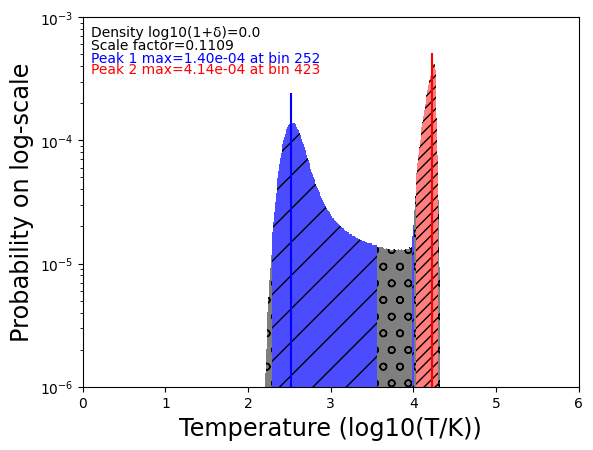

<BarContainer object of 600 artists>

In [8]:
fig = plt.figure()
axis = plt.axes()
plot_1Dhist_single('B', 0.1109, 200, 1, cutoff=0.1)

In [25]:
def subplot_1Dhist(box, scale, density, method, index, cutoff=0):
  """ Create subplot of 1D-histograms of the phase diagram data, given the required parameters

  Kwargs:
  box - char/string of the simulatiom box label (either A,B,C, or F)
  scale - scale factor (options within CROC-provided data)
  density - density bin
  method - mode separation method, either cut-off (1) or minimum (2)
  index - axis index of the subplot
  cutoff - For if the cut-off (1) method is selected, auto set to 0
  """

  arr = np.load("drive/MyDrive/UoM REU Project 2023/igm_phase_data/" + box + "/nT.a=" + str(scale).ljust(6, "0") +".bin.npy")

  #Normalize array
  sum = np.sum(arr)
  arr = arr/sum

  tempProb = np.zeros(600) #temperature-probability array
  pulse1 = np.zeros(600)
  pulse2 = np.zeros(600)


  for i in range(600):
    tempProb[i] = arr[i, density]

  if(method == 1): ### FOR CUT-OFF METHOD
    for i in range(600):
      if(i > 84 and i < 400): # Add to array in order to find the peak val of mode 1
        pulse1[i] = tempProb[i]
      if(i >= 400): # Add to array in order to find the peak val of mode 2
        pulse2[i] = tempProb[i]

    pulse1Max = pulse1.max()
    pulse2Max = pulse2.max()

    #Cut off everything below 10% of the maximum for each mode
    limit1 = pulse1Max * cutoff
    limit2 = pulse2Max * cutoff

    limitedHist = np.zeros(600)
    belowLim = np.zeros(600)
    aboveLimNorm = np.zeros(600)

    pulse1 = np.zeros(600)
    pulse2 = np.zeros(600)

    for i in range(600): ### Now, separate the cut off and not cut off values for plotting the method
      if(i > 84 and i < 400):
        if(tempProb[i] - limit1 >= 0):
          aboveLimNorm[i] = tempProb[i]
          pulse1[i] = aboveLimNorm[i]
        else:
          belowLim[i] = tempProb[i]
      if(i >= 400):
        if(tempProb[i] - limit2 >= 0):
          aboveLimNorm[i] = (tempProb[i])
          pulse2[i] = aboveLimNorm[i]
        else:
          belowLim[i] = tempProb[i]
  elif(method == 2): ### FOR MINIMUM METHOD
    minRange = np.zeros(600)

    for i in range(600): # Ensuring that the minimum remains between the two mode peaks (as the peaks get closer and closer)
      if(i >= 380 and i < 415):
        minRange[i] = tempProb[i]

    minIndex = 380
    minVal = minRange[380]
    for i in range(380, 415):
      if(minRange[i] < minVal):
        minVal = minRange[i]
        minIndex = i

    pulse1 = np.zeros(600)
    pulse2 = np.zeros(600)

    for i in range(600):
      if(i < minIndex):
        pulse1[i] = tempProb[i]
      else:
        pulse2[i] = tempProb[i]

  pulse1Max = pulse1.max()
  pulse1MaxInd = np.argmax(pulse1)
  pulse2Max = pulse2.max()
  pulse2MaxInd = np.argmax(pulse2)
  pulse1sum = pulse1.sum()
  pulse2sum = pulse2.sum()

  x = np.linspace(0, 6, 600)

  map1 = axis[index].bar(x, pulse1, align = 'edge', width = 0.01, color = 'blue', alpha = 0.7, hatch='/', label='Mode 1')
  map2 = axis[index].bar(x, pulse2, align = 'edge', width = 0.01, color = 'red', alpha = 0.5, hatch='///', label= 'Mode 2')
  if(method == 1):
    map3 = axis[index].bar(x, belowLim, align = 'edge', width = 0.01, color = 'black', alpha = 0.5, hatch='o', label='Cut-off of ' + str(cutoff * 100) + '%')
    axis[index].legend([map1, map2, map3], labels=['Mode 1', 'Mode 2', "Cut-off of " + str(cutoff * 100) + "%"], loc='upper center', fontsize='large')

  if(method == 2):
    map3 = axis[index].bar(minIndex, minVal, color='blueviolet', label='Minimum')
    axis[index].legend([map1, map2, map3], labels=['Mode 1', 'Mode 2', 'Minmimum'], loc='upper center', fontsize='large')

  axis[index].set_xlabel("Temperature (log10(T/K))", fontsize='xx-large')
  axis[0].set_ylabel("Probability on log-scale", fontsize='xx-large')
  axis[index].set_yscale('log')
  axis[index].set_ylim((10**-6,10**-3) )
  axis[index].set_xlim(1.8, 4.4)

  # axis[index].set_title("Probability for each temperature for scale factor a=" + str(scale).ljust(6, "0"))
  # axis[index].set_title("Probability for each temperature for log(1+δ)=" + str(density/100.0-2))

  axis[index].annotate("Scale factor=" + str(scale), [3.65, (10**-3)-(0.35*10**-3)], fontsize=11)
  axis[index].vlines(pulse1MaxInd/100.0, 0, pulse1Max+10**-4, color = 'blue')#, linestyles = 'dashed')
  axis[index].vlines(pulse2MaxInd/100.0, 0, pulse2Max+10**-4, color = 'red')#, linestyles = 'dashed')
  if(method==2):
    axis[index].vlines(minIndex/100.0, 0, tempProb[minIndex]+10**-5, color = 'blueviolet')

  # plt.show(fig)

  return map


<ipython-input-25-4135a7d2af64>:97: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  axis[index].legend([map1, map2, map3], labels=['Mode 1', 'Mode 2', "Cut-off of " + str(cutoff * 100) + "%"], loc='upper center', fontsize='large')
<ipython-input-25-4135a7d2af64>:101: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  axis[index].legend([map1, map2, map3], labels=['Mode 1', 'Mode 2', 'Minmimum'], loc='upper center', fontsize='large')


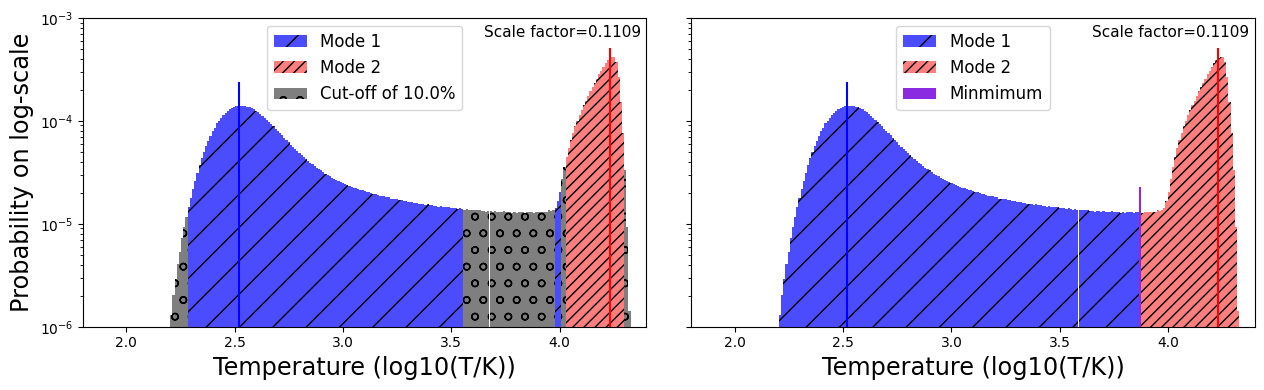

In [26]:
fig, axis = plt.subplots(ncols=2, figsize=(13, 4), sharey=True, sharex=True)

subplot_1Dhist('B', 0.1109, 200, method=1, index=0, cutoff=0.1)
subplot_1Dhist('B', 0.1109, 200, method=2, index=1, cutoff=0.1)

plt.tight_layout()
plt.show()

<ipython-input-25-4135a7d2af64>:101: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  axis[index].legend([map1, map2, map3], labels=['Mode 1', 'Mode 2', 'Minmimum'], loc='upper center', fontsize='large')


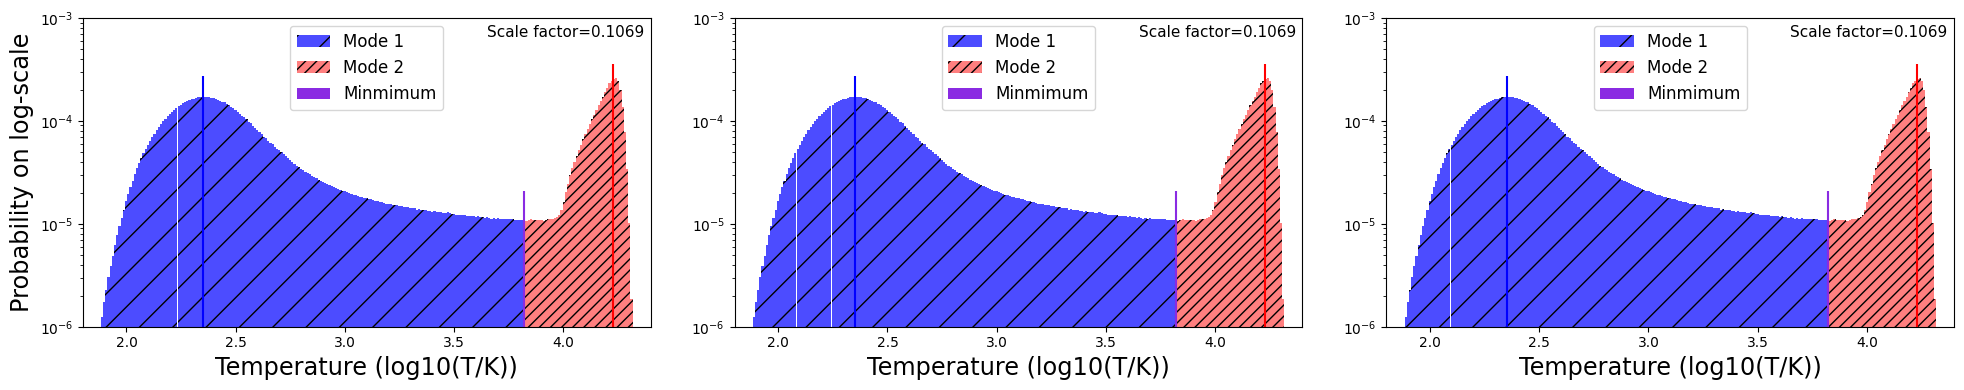

In [37]:
fig, axis = plt.subplots(ncols=3, figsize=(20, 4), sharey=False, sharex=False)
subplot_1Dhist('B', 0.1069, 200, 2, 0)
subplot_1Dhist('B', 0.1069, 200, 2, 1)
subplot_1Dhist('B', 0.1069, 200, 2, 2)

plt.tight_layout()
plt.show()